In [51]:
import json
import re
import ssl

import certifi
#import geopy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
#from geopy import Nominatim


In [52]:
# to potrzebne, bo inaczej wyskakuje GeocoderServiceError, ale ogólnie bardzo niewskazane XD
ssl._create_default_https_context = ssl._create_unverified_context

In [53]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))

In [54]:
pos["Łąg"] = [18.065844820300693, 53.831195018983074]
pos["Radomyśl"] = [ 22.381036085411196, 52.03110791812052]
pos["Jagodin"] = [ 15.169937485645997, 51.35570663746631]
pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]

In [55]:
p = pd.read_csv("data/connections_test2.csv",encoding="utf-8-sig")
len(p)

71154

In [56]:
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']]))
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()))
unique_connections = p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
unique_connections = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
unique_connections.sort()

71154
1138


In [57]:
unique_connections

[('Aleksandrów\xa0Kujawski', 'Toruń\xa0Główny'),
 ('Aleksandrów\xa0Kujawski', 'Włocławek'),
 ('Augustów', 'Dąbrowa\xa0Białostocka'),
 ('Augustów', 'Suwałki'),
 ('Babiak', 'Kutno'),
 ('Babiak', 'Piotrków\xa0Kujawski'),
 ('Babimost', 'Sulechów'),
 ('Babimost', 'Zbąszynek'),
 ('Baciuty', 'Niewodnica'),
 ('Baciuty', 'Trypucie'),
 ('Baciuty', 'Łapy'),
 ('Barczewo', 'Korsze'),
 ('Barczewo', 'Olsztyn\xa0Główny'),
 ('Bardo\xa0Śląskie', 'Kamieniec\xa0Ząbkowicki'),
 ('Bardo\xa0Śląskie', 'Kłodzko\xa0Główne'),
 ('Biała\xa0Piska', 'Ełk'),
 ('Biała\xa0Piska', 'Pisz'),
 ('Biała\xa0Podlaska', 'Chotyłów'),
 ('Biała\xa0Podlaska', 'Międzyrzec\xa0Podlaski'),
 ('Biała\xa0Podlaska', 'Terespol'),
 ('Białogard', 'Koszalin'),
 ('Białogard', 'Kołobrzeg'),
 ('Białogard', 'Szczecinek'),
 ('Białogard', 'Świdwin'),
 ('Białystok', 'Białystok\xa0Starosielce'),
 ('Białystok', 'Bielsk\xa0Podlaski'),
 ('Białystok', 'Niewodnica'),
 ('Białystok', 'Sokółka'),
 ('Białystok', 'Łapy'),
 ('Białystok\xa0Starosielce', 'Białystok

In [58]:
test_trains = p["nazwa_pociagu"].unique()
len(test_trains)

390

ECE 14000/1 SILESIA
[('Warszawa\xa0Wschodnia', 'Warszawa\xa0Centralna'), ('Warszawa\xa0Centralna', 'Warszawa\xa0Zachodnia'), ('Warszawa\xa0Zachodnia', 'Grodzisk\xa0Mazowiecki'), ('Grodzisk\xa0Mazowiecki', 'Opoczno\xa0Południe'), ('Opoczno\xa0Południe', 'Włoszczowa\xa0Północ'), ('Włoszczowa\xa0Północ', 'Zawiercie'), ('Zawiercie', 'Dąbrowa\xa0Górnicza'), ('Dąbrowa\xa0Górnicza', 'Sosnowiec\xa0Główny'), ('Sosnowiec\xa0Główny', 'Katowice'), ('Katowice', 'Tychy'), ('Tychy', 'Rybnik'), ('Rybnik', 'Wodzisław\xa0Śląski'), ('Wodzisław\xa0Śląski', 'Chałupki'), ('Chałupki', 'Bohumin')]
ECE 14002/3 POLONIA
[('Warszawa\xa0Wschodnia', 'Warszawa\xa0Centralna'), ('Warszawa\xa0Centralna', 'Warszawa\xa0Zachodnia'), ('Warszawa\xa0Zachodnia', 'Zawiercie'), ('Zawiercie', 'Sosnowiec\xa0Główny'), ('Sosnowiec\xa0Główny', 'Katowice'), ('Katowice', 'Tychy'), ('Tychy', 'Pszczyna'), ('Pszczyna', 'Zebrzydowice'), ('Zebrzydowice', 'Petrovice\xa0u\xa0Karvine')]
ECE 14004/5 BATORY
[('Terespol', 'Biała\xa0Podlaska'), (

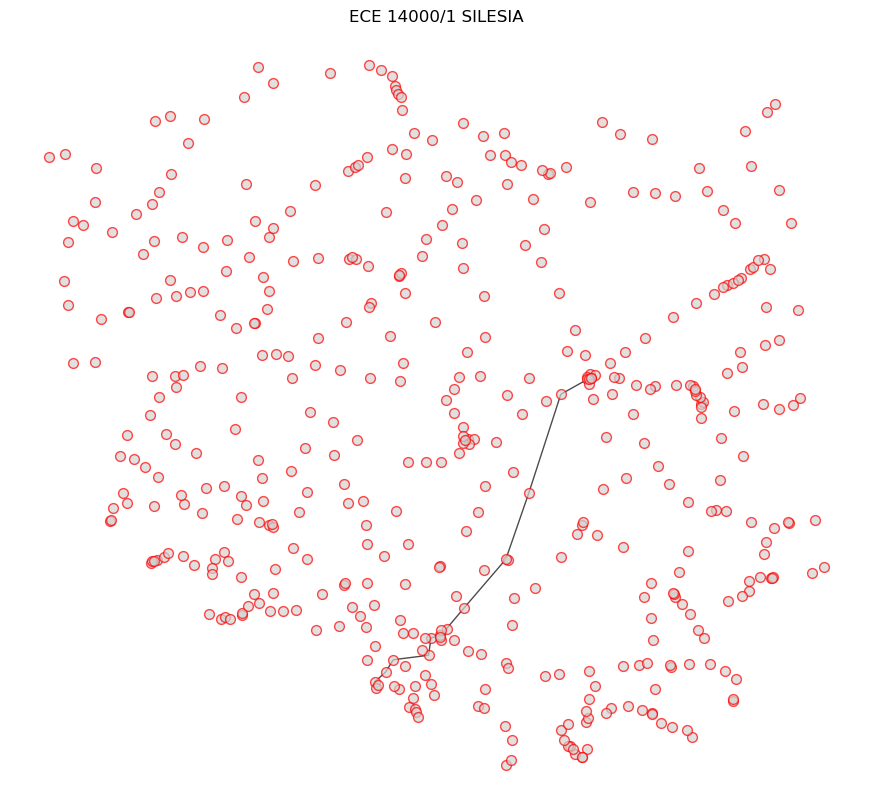

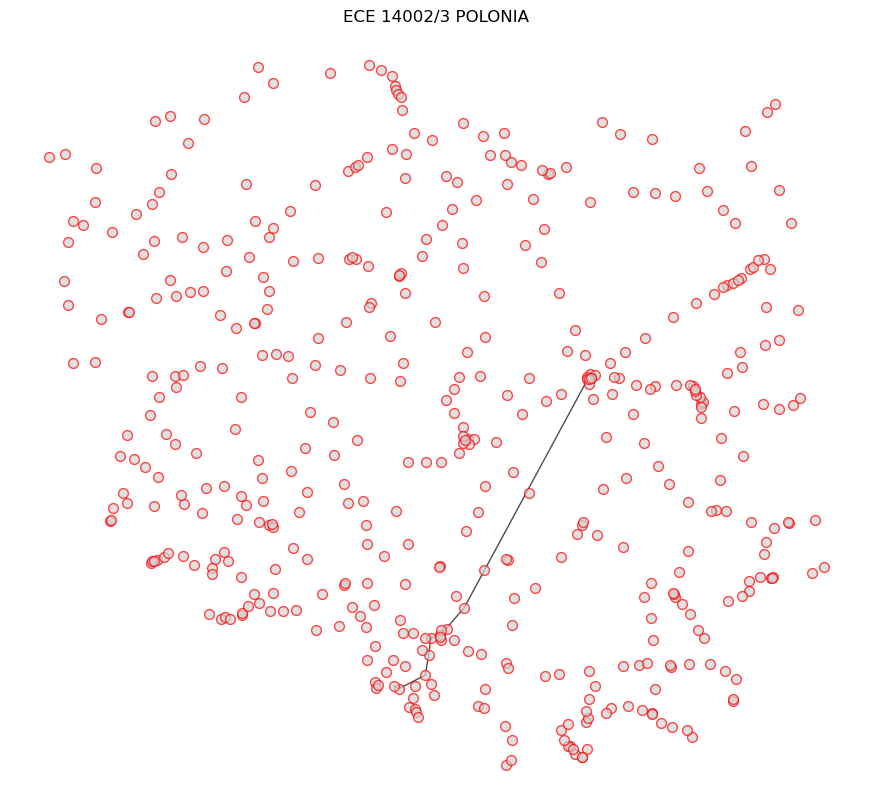

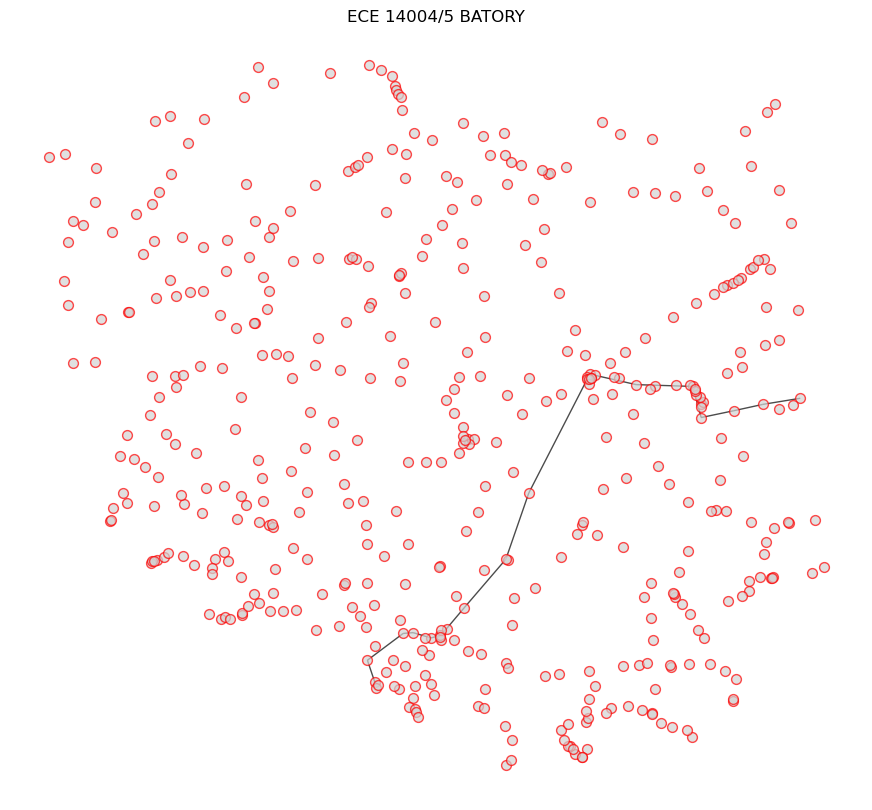

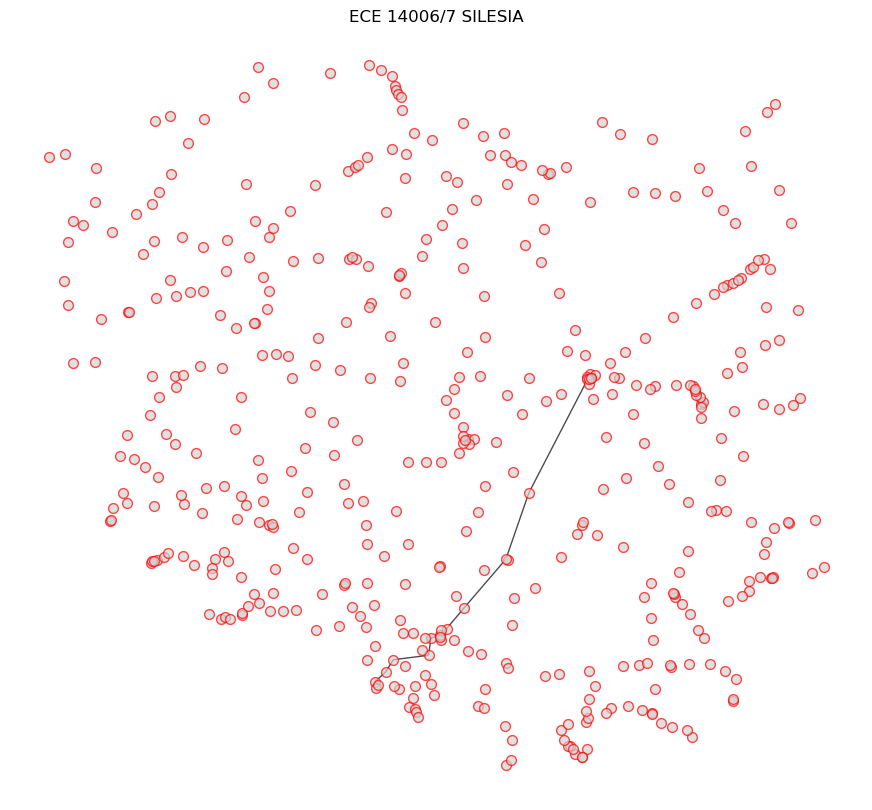

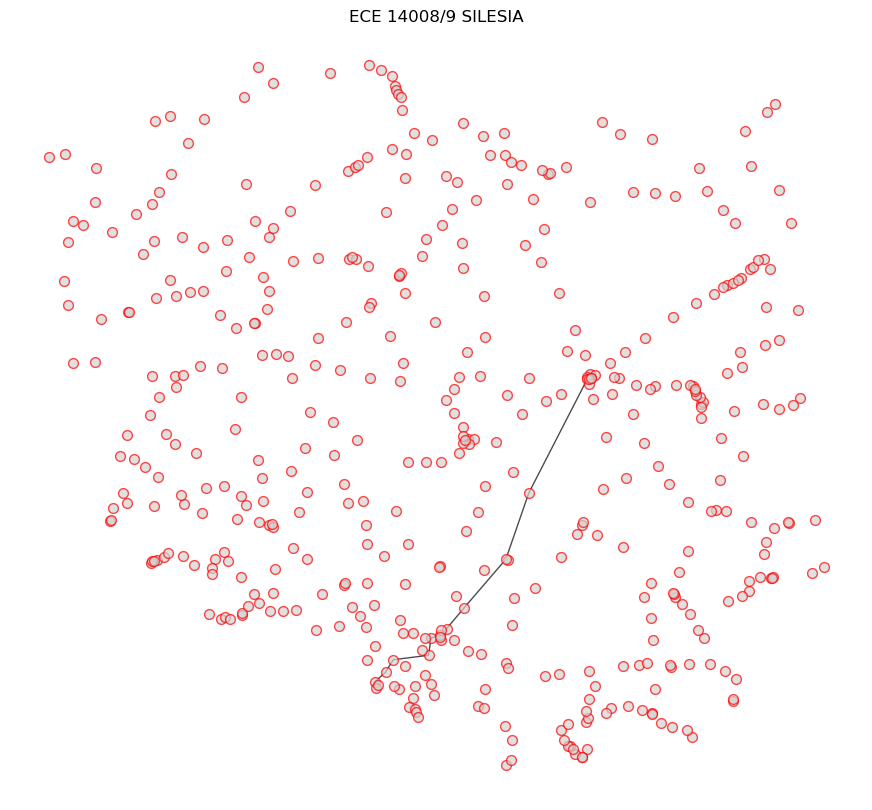

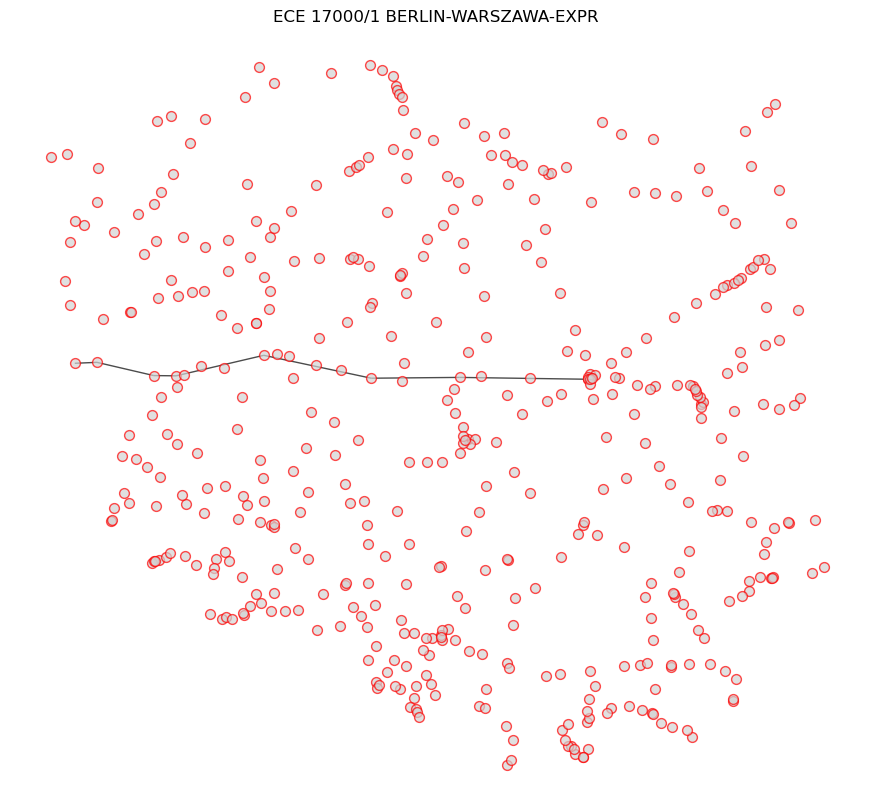

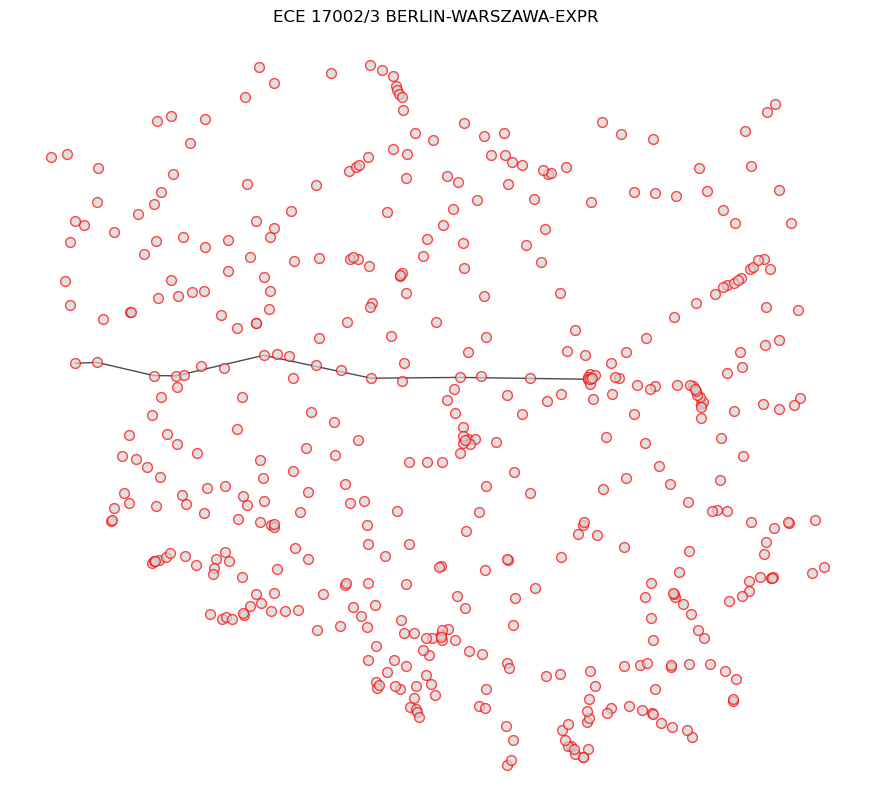

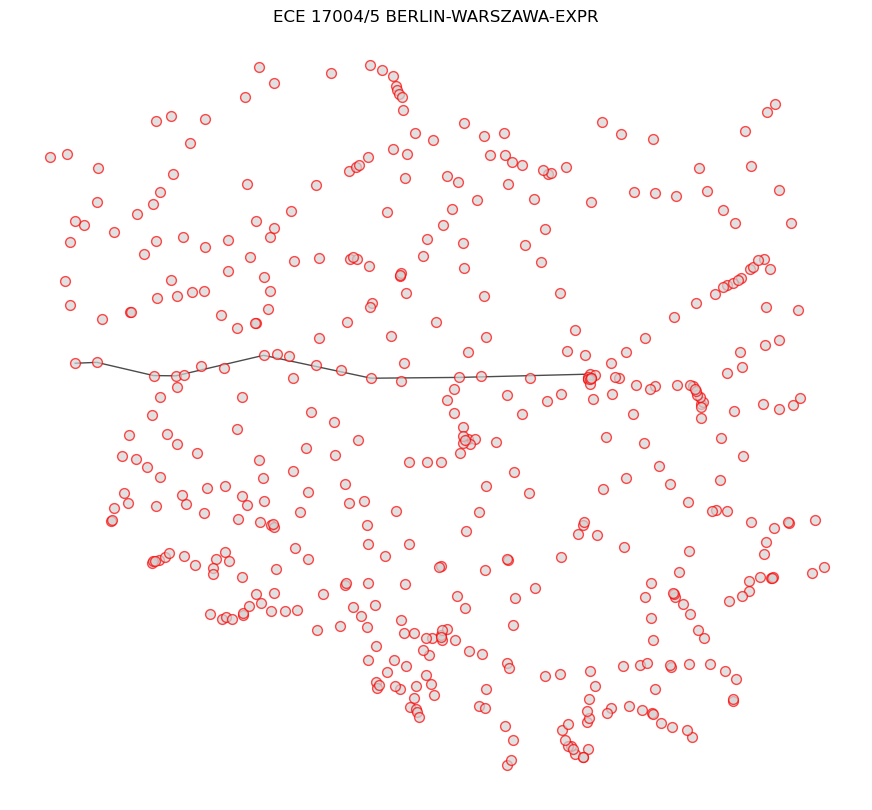

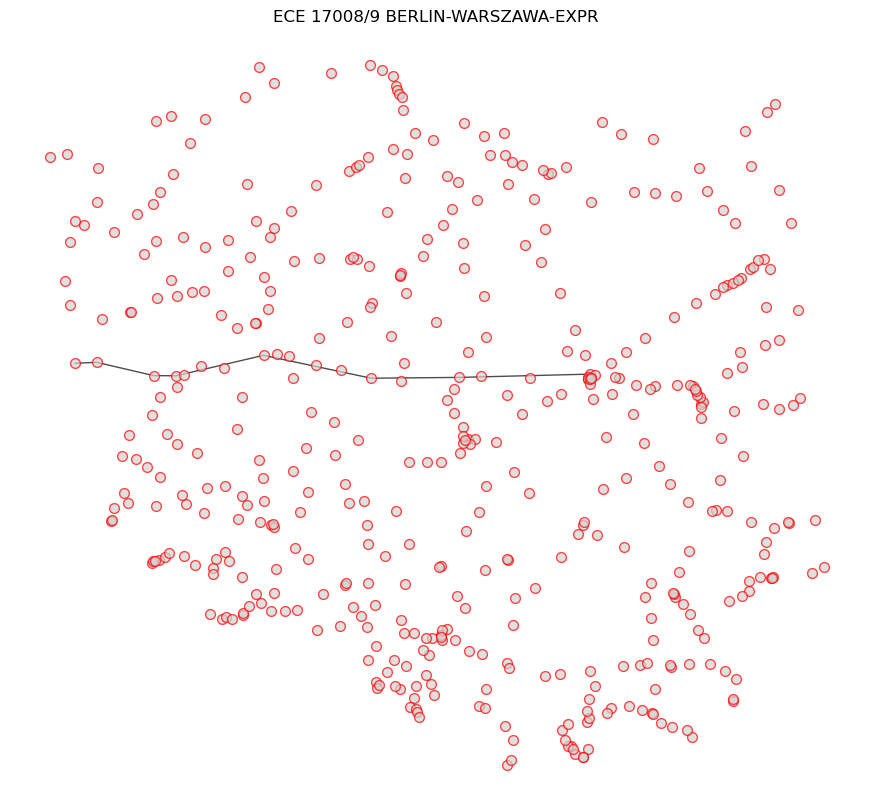

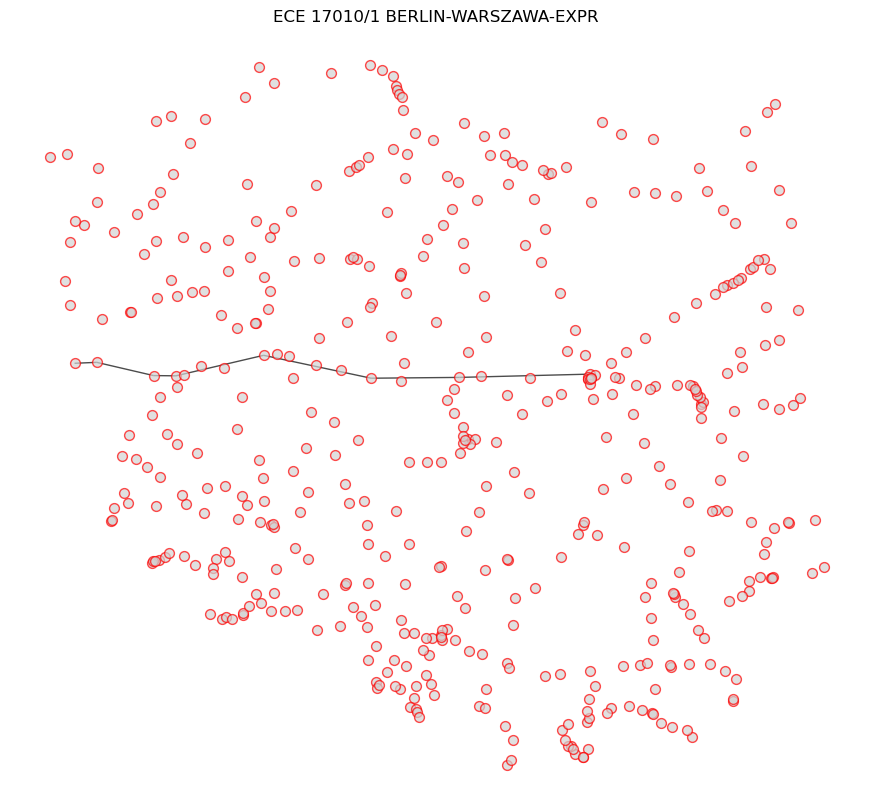

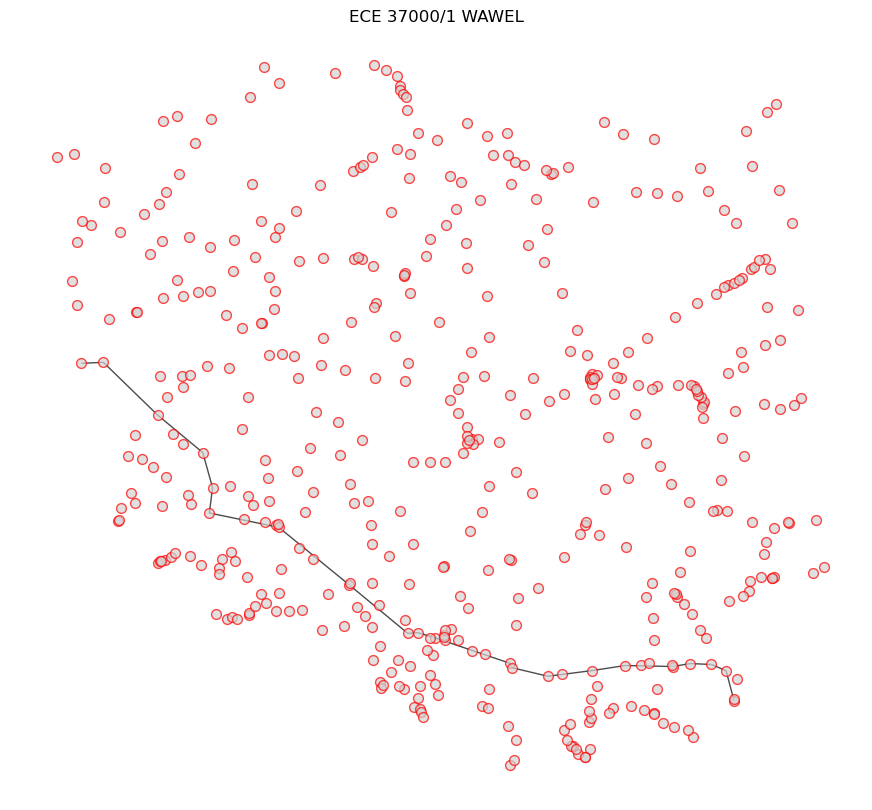

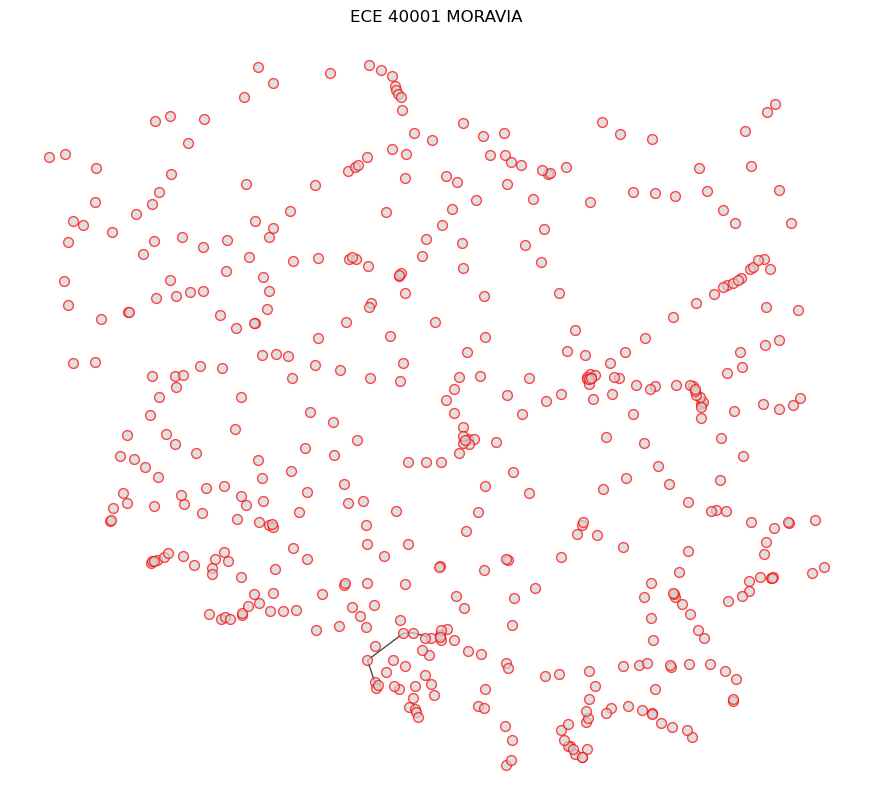

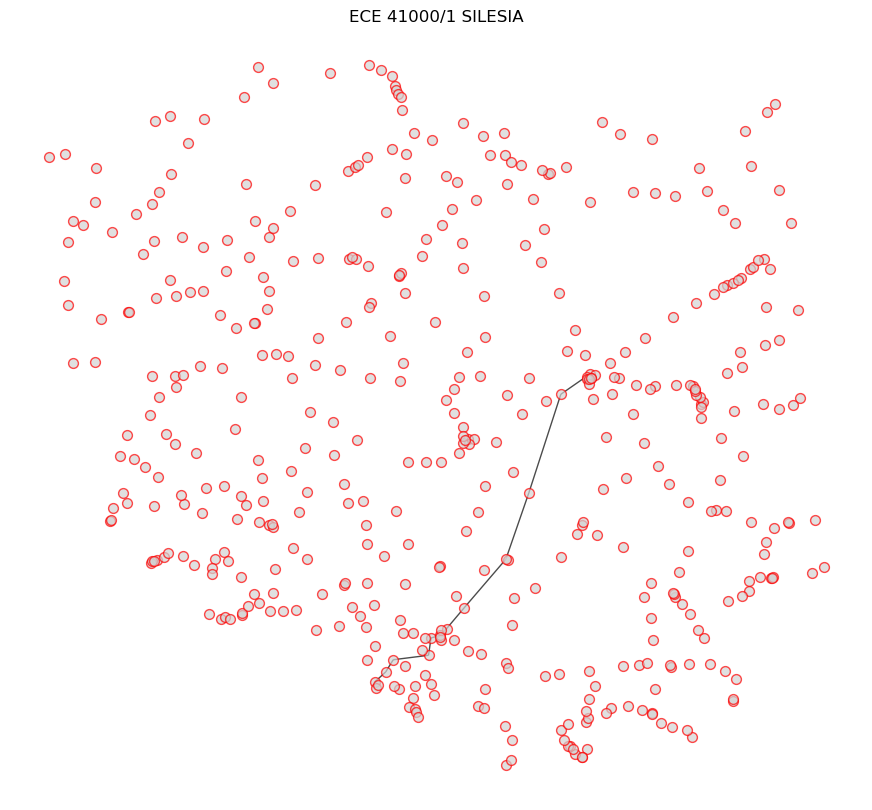

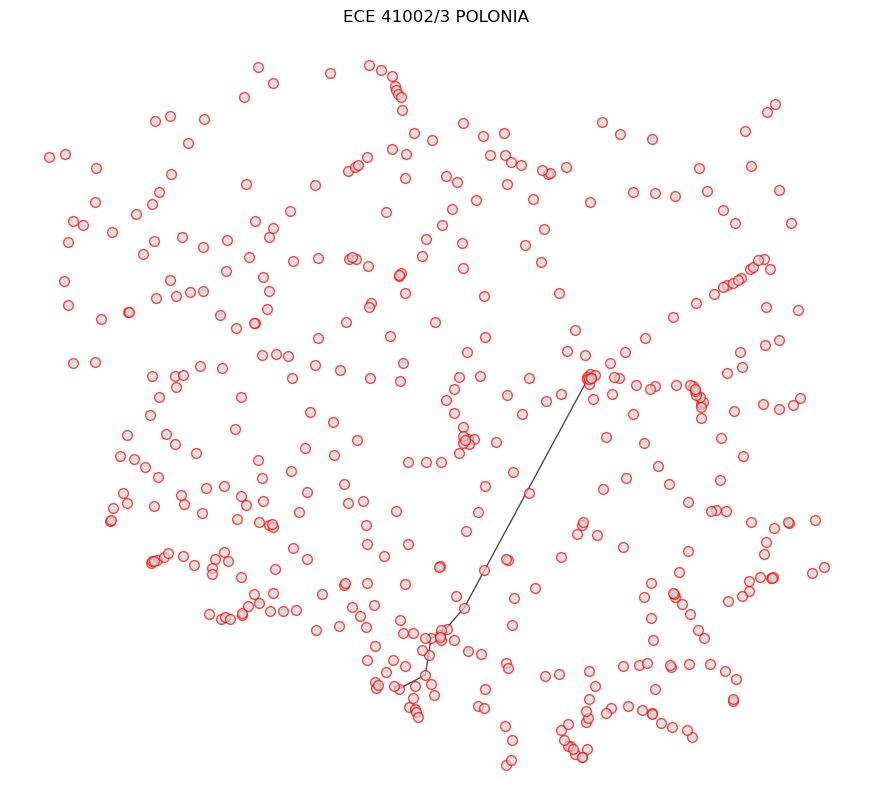

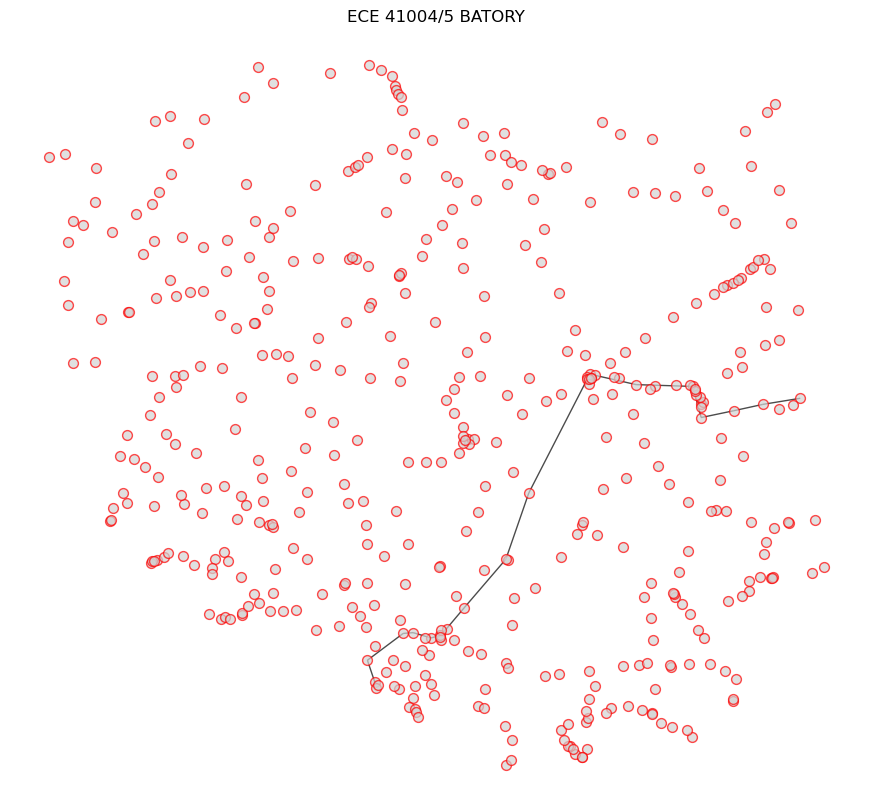

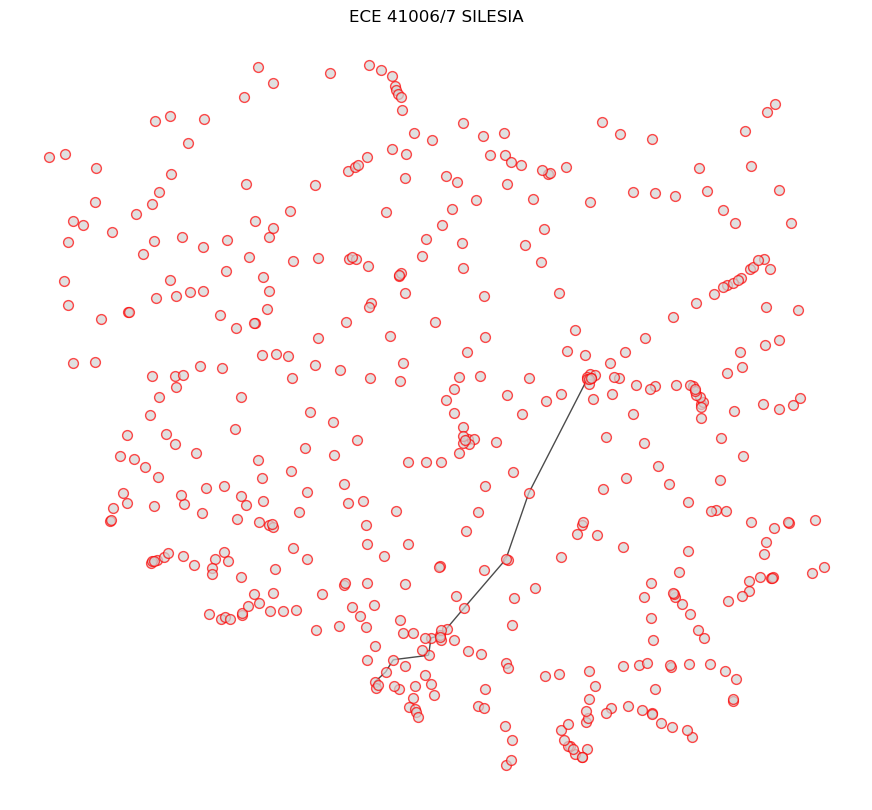

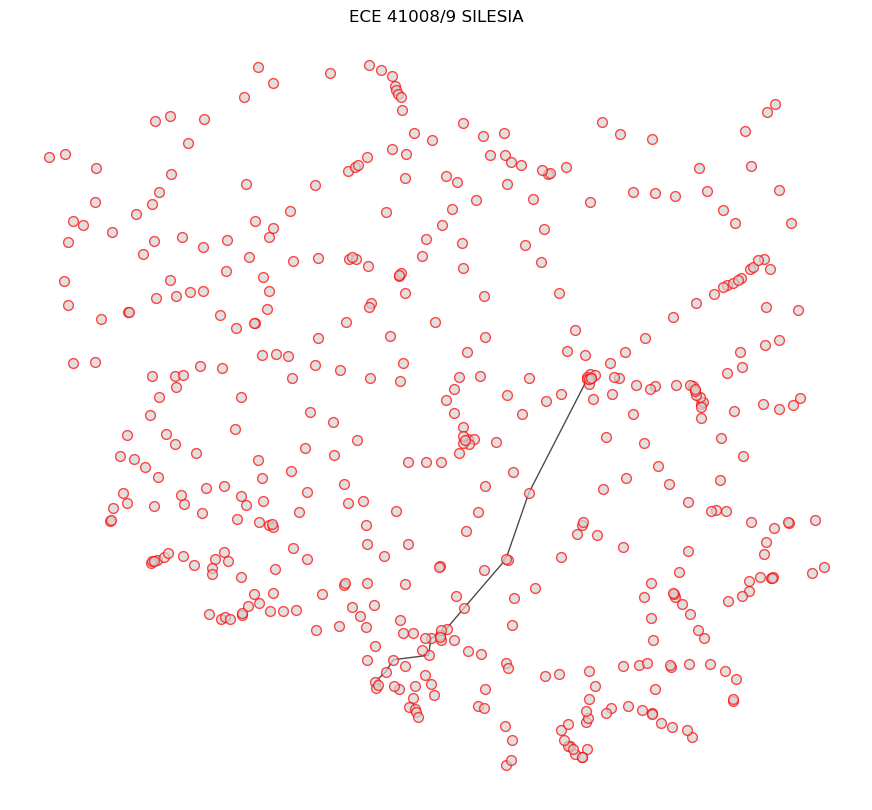

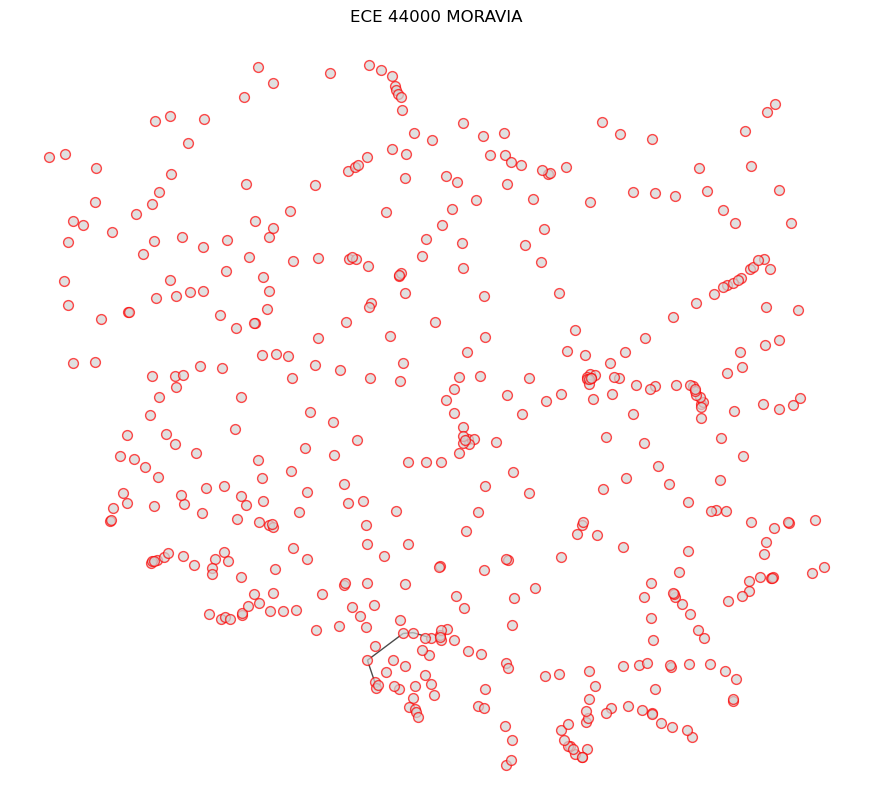

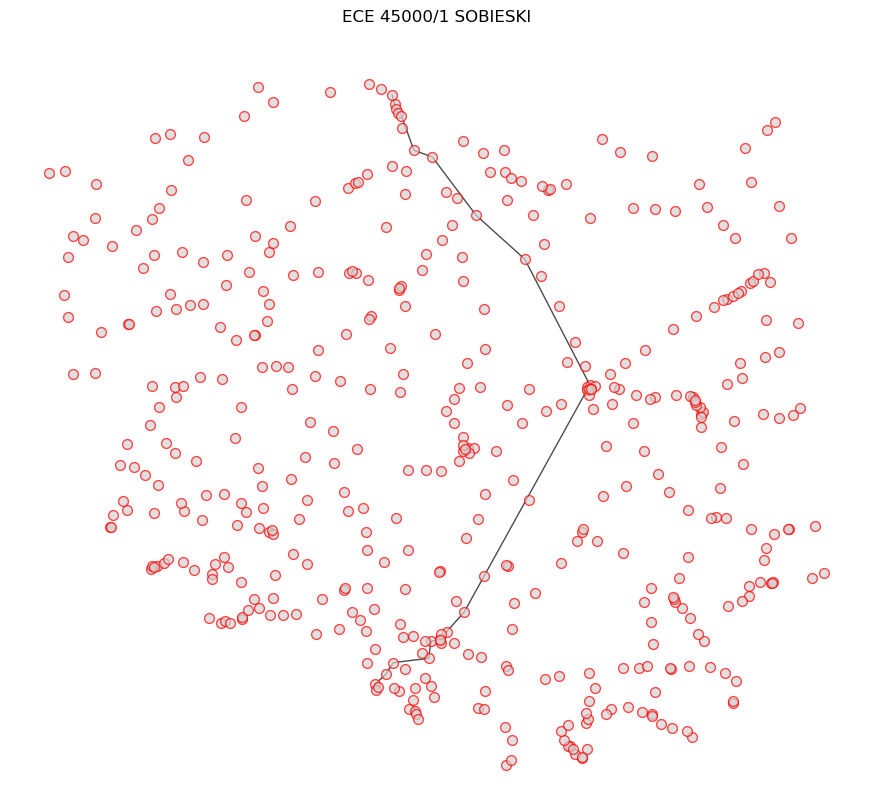

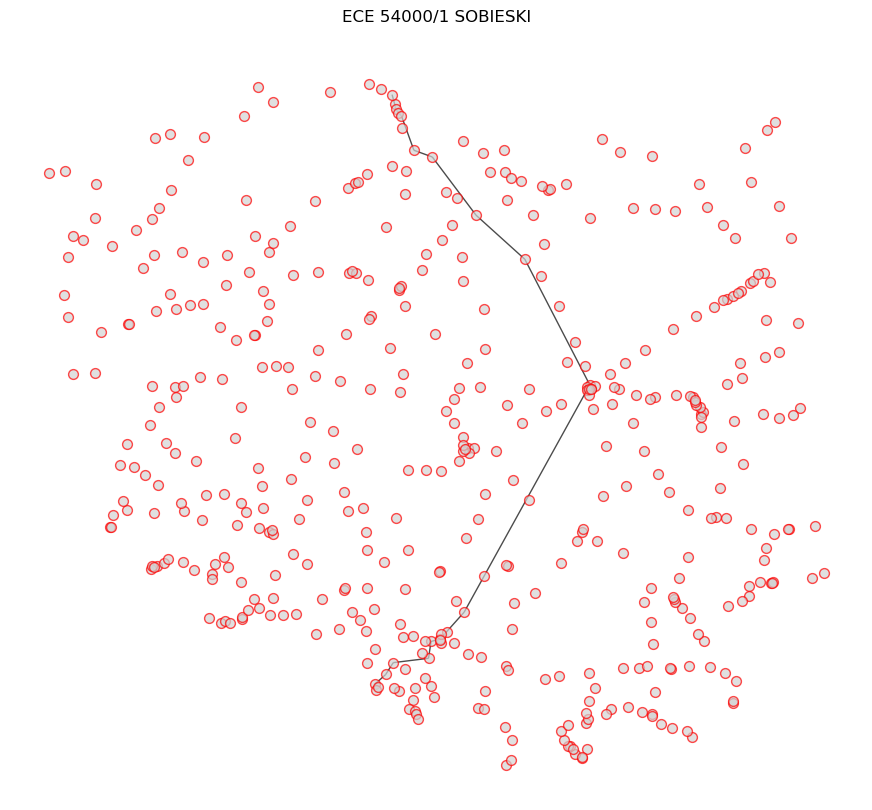

In [59]:
nodes = list(pos.keys())
for train_name in test_trains[:20]:
    plt.figure(figsize=(11,10))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    temp_connections = p.loc[p["nazwa_pociagu"]== train_name][['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
    plt.title(train_name)
    edges = [(conn[1],conn[2]) for conn in temp_connections.itertuples()]
    print(train_name)
    print(edges)
    G.add_edges_from( edges )
    labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
    nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

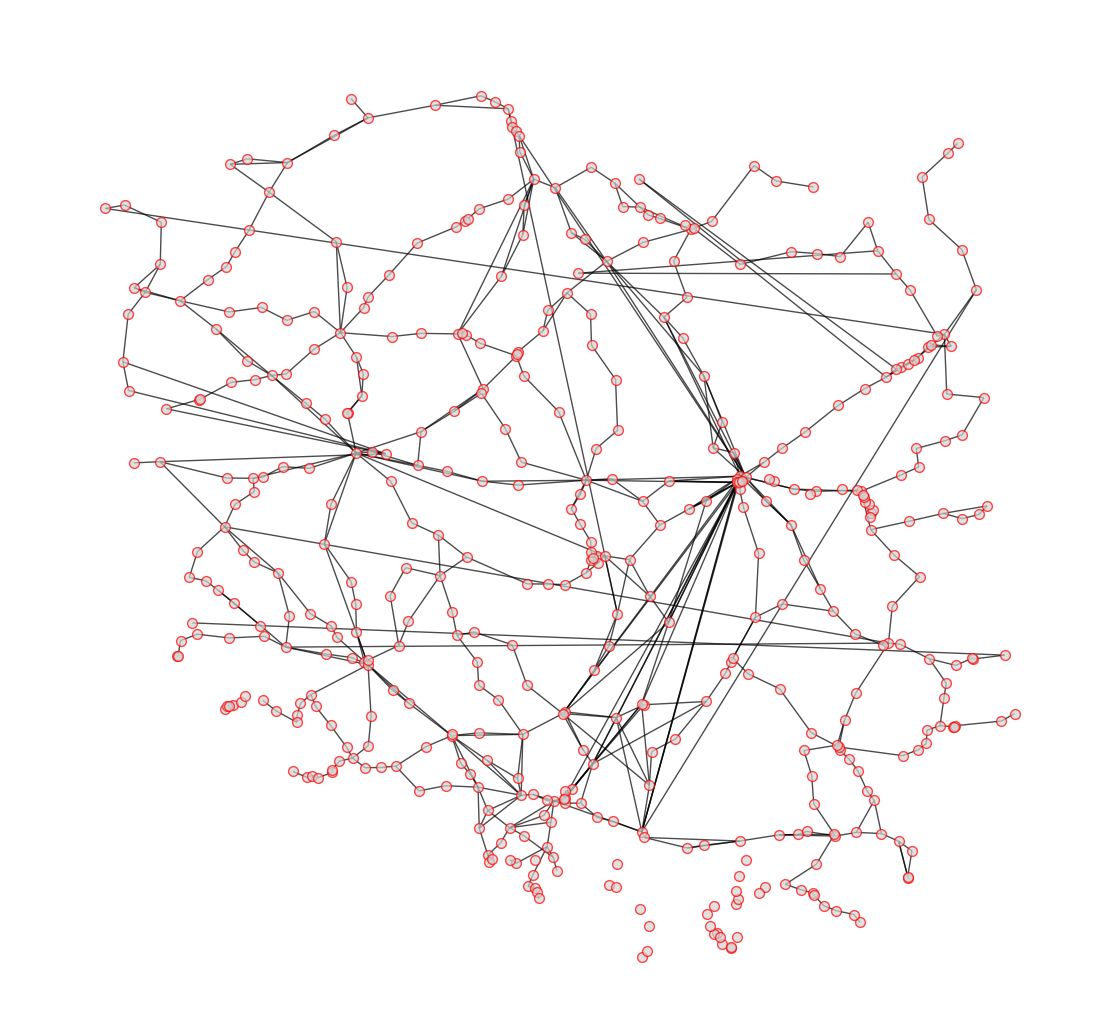

In [60]:
plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from( unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

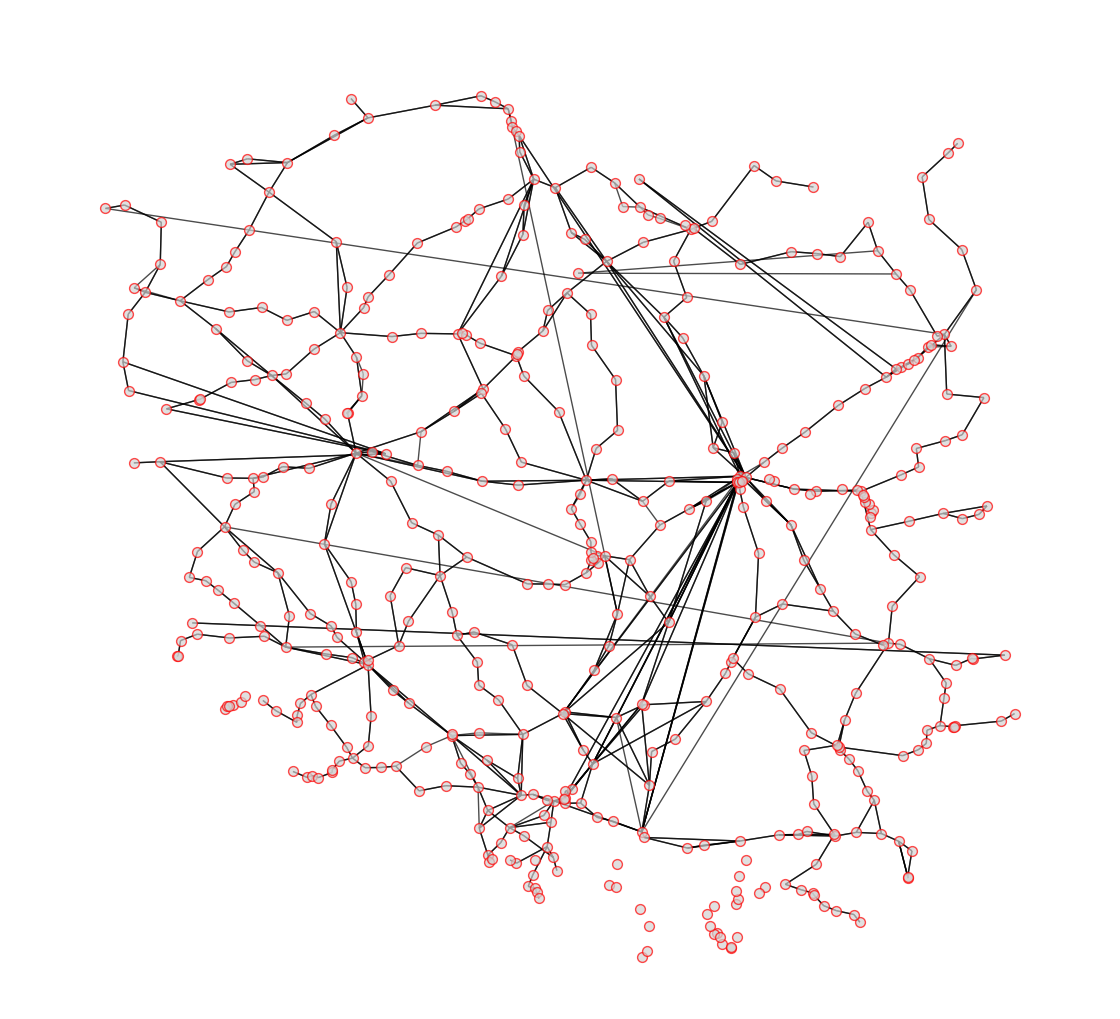

In [61]:
plt.figure(figsize=(11,10))
G = nx.DiGraph()
#edges = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
G.add_nodes_from(nodes)
G.add_edges_from(unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray', arrows = False)

## One-way connections

In [62]:
one_way_connections = [(s1, s2) for (s1, s2) in unique_connections if (s2, s1) not in unique_connections]

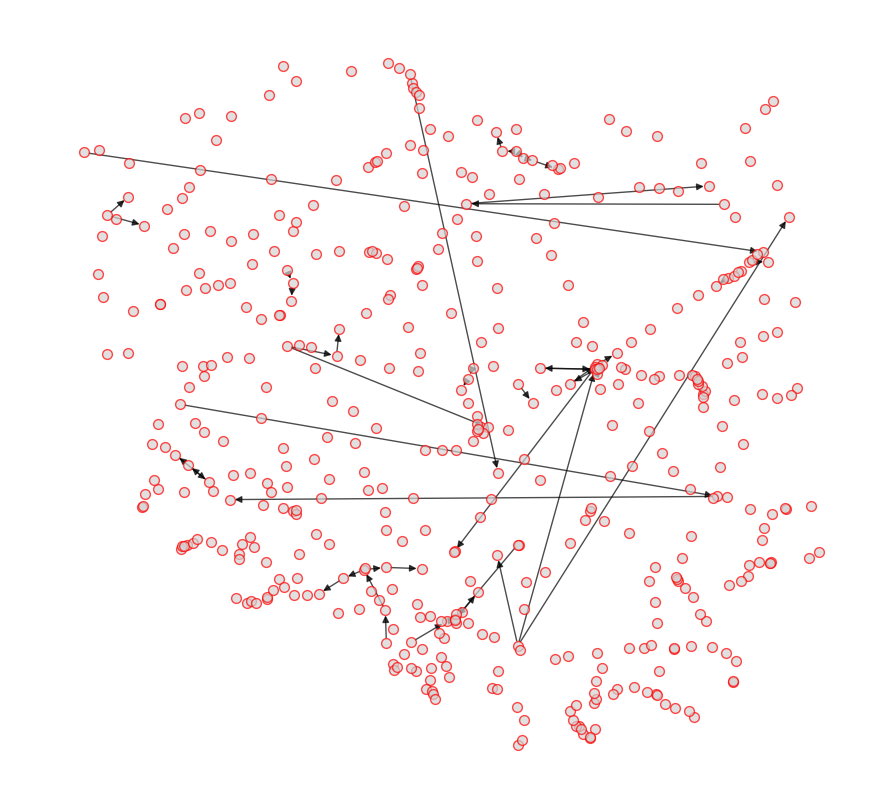

In [63]:
fig, ax = plt.subplots(figsize = (11,10))
G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
G2.add_edges_from(one_way_connections)
nx.draw(
    G2,
    pos,
    node_size = 50,
    alpha = 0.7,
    edgecolors = "red", 
    node_color = "lightgray"
    #connectionstyle = 'arc3, rad = 0.1'
)

## Mean delay

In [64]:
mean_delays = p[["stacja_wyjazdu", "stacja_przyjazdu", "opoznienie_netto"]] \
    .groupby(["stacja_wyjazdu", "stacja_przyjazdu"]) \
    .mean()
mean_delays

opoznienie_netto
stacja_wyjazdu       stacja_przyjazdu                            
Aleksandrów Kujawski Toruń Główny                       -0.117647
                     Włocławek                           0.128788
Augustów             Dąbrowa Białostocka                 0.000000
                     Suwałki                            -0.916667
Babiak               Kutno                              -8.250000
...                                                           ...
Żyrardów             Grodzisk Mazowiecki                -1.000000
                     Skierniewice                        1.670000
                     Warszawa Gdańska                    1.238342
                     Warszawa Zachodnia                  3.098361
                     Warszawa Zachodnia peron 9          6.250000

[1138 rows x 1 columns]

In [65]:
for u, v, d in G.edges(data = True):
    d["weight"] = mean_delays.loc[(u, v), "opoznienie_netto"]
edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())

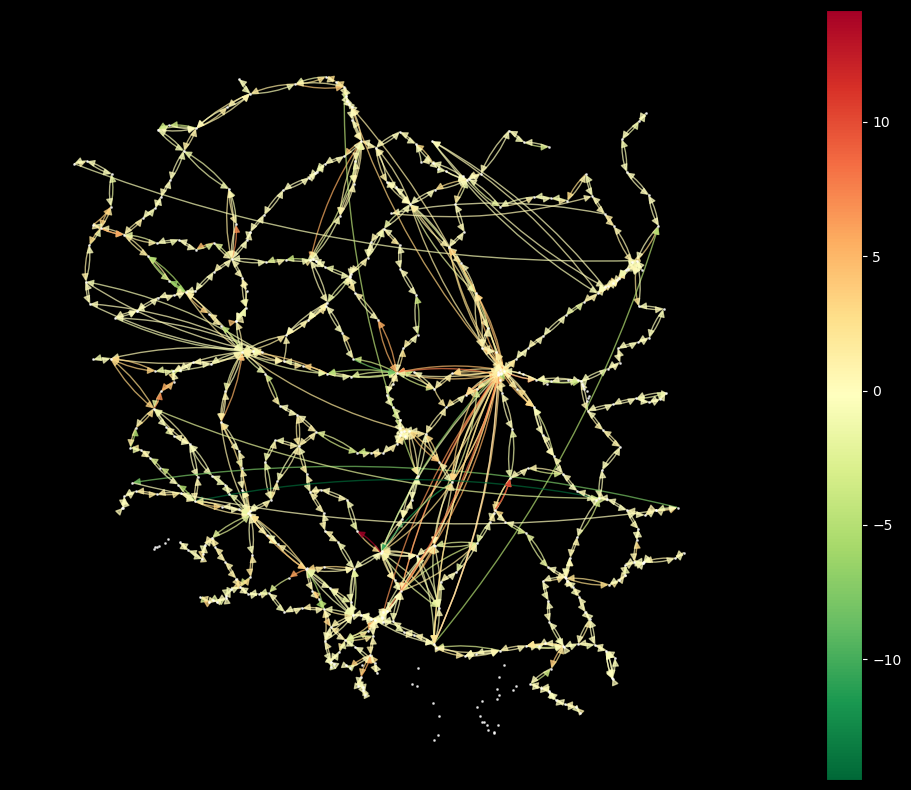

In [66]:
fig, (ax, cax) = plt.subplots(ncols = 2, figsize = (11, 10), gridspec_kw = {"width_ratios":[1, 0.05]})

nx.draw(
    G, 
    pos,
    ax = ax, 
    node_size = 1, 
    node_color = "white",
    alpha = 0.7,
    edgelist = edges, 
    edge_color = weights, 
    edge_cmap = plt.cm.RdYlGn_r,
    arrows = True,
    connectionstyle = 'arc3, rad = 0.1'
)

fig.set_facecolor("black")

sm = plt.cm.ScalarMappable(cmap = plt.cm.RdYlGn_r, norm = plt.Normalize(vmin = min(weights), vmax = max(weights)))
sm.set_array([])
cax.tick_params(axis = 'x', colors = 'white')    
cax.tick_params(axis = 'y', colors = 'white') 
cbar = plt.colorbar(sm, cax = cax)

 

In [67]:
df = pd.read_csv("data/data_updated.csv", na_values = "--")
mean_delays_nodes = df[["stacja_pomiaru", "opoznienie"]] \
    .groupby("stacja_pomiaru") \
    .mean("opoznienie")
mean_delays_nodes

,opoznienie
stacja_pomiaru,
Aleksandrów Kujawski,6.509121
Augustów,7.946809
Babiak,5.854545
Babimost,8.361111
Baciuty,4.658228
...,...
Żegiestów-Zdrój,1.810526
Żmigród,3.806832
Żory,4.252336


In [71]:
for u, d in G.nodes(data = True):
    d["weight"] = mean_delays_nodes.loc[u, "opoznienie"]
nodes, weights = zip(*nx.get_node_attributes(G, "weight").items())

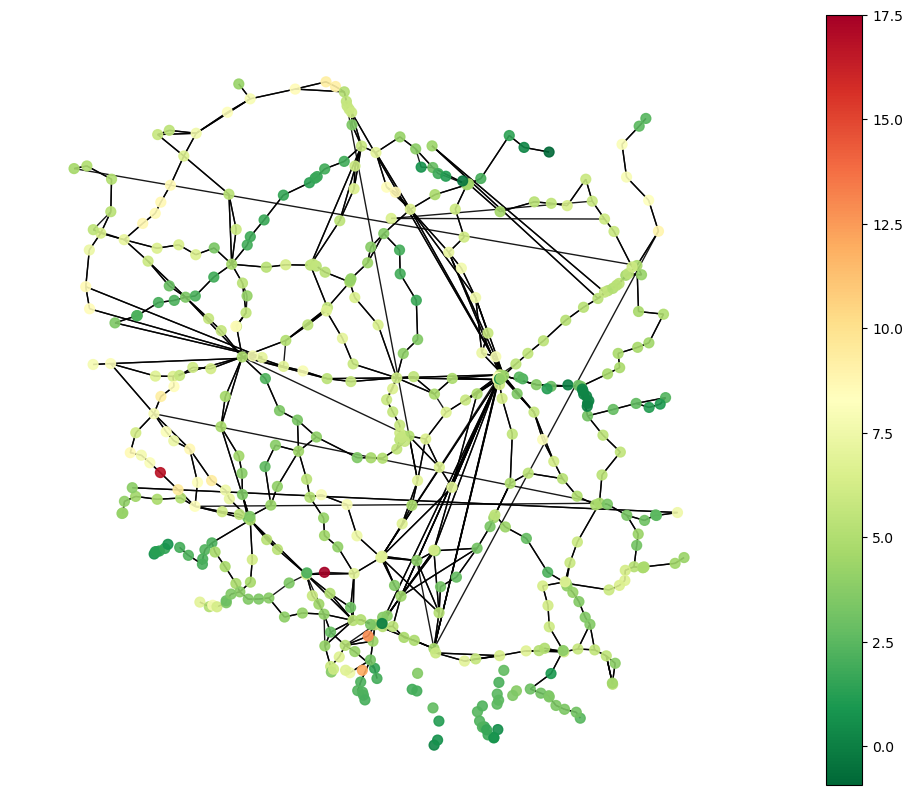

In [74]:
fig, (ax, cax) = plt.subplots(ncols = 2, figsize = (11, 10), gridspec_kw = {"width_ratios":[1, 0.05]})

nx.draw(
    G, 
    pos,
    ax = ax, 
    node_size = 50, 
    node_color = weights,
    cmap = plt.cm.RdYlGn_r,
    alpha = 0.9,
    edgelist = edges,
    arrows = False
)


sm = plt.cm.ScalarMappable(cmap = plt.cm.RdYlGn_r, norm = plt.Normalize(vmin = min(weights), vmax = max(weights)))
sm.set_array([])
cax.tick_params(axis = 'x', colors = 'black')    
cax.tick_params(axis = 'y', colors = 'black') 
cbar = plt.colorbar(sm, cax = cax)